In [28]:
from collections import namedtuple
import numpy as np
from matplotlib.pyplot import plot

In [2]:
input_path = 'part_2_test_input.txt'
with open(input_path, 'r') as f:
    data = f.read().splitlines()

instruction_tuple = namedtuple('Instruction', ['direction', 'distance'])
def extract_instructions(data) -> dict[int, namedtuple]:
    instructions = []
    for row in data:
        direction, distance = row.split(' ')
        instructions.append(instruction_tuple(direction=direction, distance=int(distance)))

    return instructions

instructions = extract_instructions(data)

direction_mapping = {'R':np.array([[1],[0]]), 
                     'L':np.array([[-1],[0]]), 
                     'U':np.array([[0],[1]]), 
                     'D':np.array([[0],[-1]])}

In [3]:
def execute(instruction, h_position, t_position):
    h_positions = [h_position]
    t_positions = [t_position]

    for _ in range(instruction.distance):
        # update h position
        h_position = h_position + direction_mapping[instruction.direction]
        h_positions.append(h_position)

        distance = np.linalg.norm(h_position - t_position)

        # update t position
        if distance in [np.sqrt(2), 0, 1]:
            continue
        else:
            t_position = h_positions[-2]
            t_positions.append(t_position)
    return h_positions, t_positions

In [4]:
# part 1
h_position = np.array([[0],[0]])
t_position = np.array([[0],[0]])
h_positions = [h_position]
t_positions = [t_position]

for instruction in instructions:
    for _ in range(instruction.distance):
        # update h position
        h_position = h_position + direction_mapping[instruction.direction]
        h_positions.append(h_position)

        distance = np.linalg.norm(h_position - t_position)

        # update t position
        if distance in [np.sqrt(2), 0, 1]:
            continue
        else:
            t_position = h_positions[-2]
            t_positions.append(t_position)

unique_t_pos = set([tuple(sum(position.tolist(), [])) for position in t_positions])
print(len(unique_t_pos))

In [8]:
# part 2 test
h_position = np.array([[0],[0]])
t_position = np.array([[0],[0]])
t_positions = []
h_positions = []

positions = [np.array([[0],[0]]) for _ in range(9)]

for instruction in instructions:
    for id in range(9):
        h_steps, t_steps = execute(instruction, positions[id], positions[id+1])
        t_positions.extend(t_steps)
        h_positions.extend(h_steps)


# t_positions
unique_t_pos = set([tuple(sum(position.tolist(), [])) for position in t_positions])
print(len(unique_t_pos))

69


In [48]:
# part 2
positions = [np.array([[0],[0]]) for _ in range(9)]
priors = [np.array([[0],[0]]) for _ in range(9)]
t_positions = [positions[-1]]


for instruction in instructions:
    for _ in range(instruction.distance):
        # update h position
        positions[0] = positions[0] + direction_mapping[instruction.direction]
        for id in range(len(positions[:-1])):
            
            distance = np.linalg.norm(positions[id] - positions[id+1])
            
            # update t position
            if distance in [np.sqrt(2), 1, 0]:
                t_positions.append(positions[-1])
                print('no', id, distance)
            else:
                positions[id+1] = priors[id]
                t_positions.append(positions[-1])
                print('yes', id, distance)
            priors = positions.copy()
unique_t_pos = set([tuple(sum(position.tolist(), [])) for position in t_positions])
print(len(unique_t_pos))


no 0 1.0
no 1 0.0
no 2 0.0
no 3 0.0
no 4 0.0
no 5 0.0
no 6 0.0
no 7 0.0
yes 0 2.0
no 1 1.0
no 2 0.0
no 3 0.0
no 4 0.0
no 5 0.0
no 6 0.0
no 7 0.0
yes 0 2.0
yes 1 2.0
yes 2 2.0
yes 3 2.0
yes 4 2.0
yes 5 2.0
yes 6 2.0
yes 7 2.0
yes 0 2.0
no 1 1.0
no 2 0.0
no 3 0.0
no 4 0.0
no 5 0.0
no 6 0.0
no 7 0.0
yes 0 2.0
yes 1 2.0
yes 2 2.0
yes 3 2.0
yes 4 2.0
yes 5 2.0
yes 6 2.0
yes 7 2.0
no 0 1.4142135623730951
no 1 0.0
no 2 0.0
no 3 0.0
no 4 0.0
no 5 0.0
no 6 0.0
no 7 0.0
yes 0 2.23606797749979
no 1 1.4142135623730951
no 2 0.0
no 3 0.0
no 4 0.0
no 5 0.0
no 6 0.0
no 7 0.0
yes 0 2.0
yes 1 2.23606797749979
yes 2 2.23606797749979
yes 3 2.23606797749979
yes 4 2.23606797749979
yes 5 2.23606797749979
yes 6 2.23606797749979
yes 7 2.23606797749979
yes 0 2.0
no 1 1.0
no 2 0.0
no 3 0.0
no 4 0.0
no 5 0.0
no 6 0.0
no 7 0.0
yes 0 2.0
yes 1 2.0
yes 2 2.0
yes 3 2.0
yes 4 2.0
yes 5 2.0
yes 6 2.0
yes 7 2.0
yes 0 2.0
no 1 1.0
no 2 0.0
no 3 0.0
no 4 0.0
no 5 0.0
no 6 0.0
no 7 0.0
yes 0 2.0
yes 1 2.0
yes 2 2.0
yes 3 2

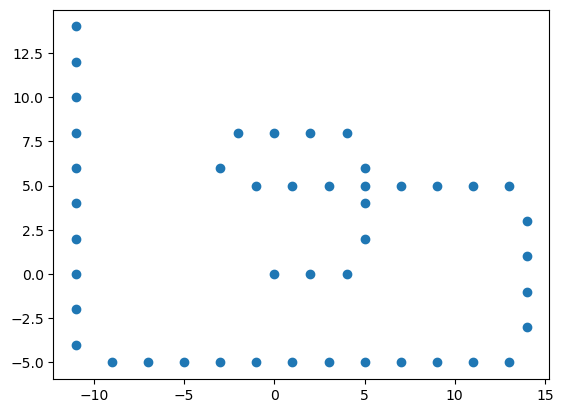

In [45]:
x_positions = [t_position[0] for t_position in unique_t_pos]
y_positions = [t_position[1] for t_position in unique_t_pos]
plot(x_positions, y_positions,'o')

# R 5
# U 8
# L 8
# D 3
# R 17
# D 10
# L 25
# U 20